# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
# Write your code here
import csv
import re

# Function to clean and tokenize the text
def clean_text(text):
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = cleaned_text.split()
    return tokens

# generating trigrams from the tokens list
def generate_trigrams(tokens):
    trigrams = []
    for i in range(len(tokens) - 2):
        trigrams.append((tokens[i], tokens[i+1], tokens[i+2]))
    return trigrams

# counting the frequency of trigrams
def count_trigrams(trigrams_list):
    trigram_counts = {}
    for trigram in trigrams_list:
        if trigram in trigram_counts:
            trigram_counts[trigram] += 1
        else:
            trigram_counts[trigram] = 1
    return trigram_counts

# reading the dataset to conduct analysis
def ngram_analysis(dataset_file):
    trigrams_list = []
    with open(dataset_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            clean_review = row['Clean_Review']
            tokens = clean_text(clean_review)
            trigrams = generate_trigrams(tokens)
            trigrams_list.extend(trigrams)

    trigram_counts = count_trigrams(trigrams_list)
    return trigram_counts

dataset_file = '/content/imdb_reviews_dataset.csv'

# performing N-gram analysis (N=3)
trigram_counts = ngram_analysis(dataset_file)
for trigram, count in trigram_counts.items():
    print(f'Trigram: {trigram}, Frequency: {count}')


Trigram: ('man', 'wish', 'love'), Frequency: 30
Trigram: ('wish', 'love', 'movi'), Frequency: 30
Trigram: ('love', 'movi', 'dont'), Frequency: 30
Trigram: ('movi', 'dont', 'get'), Frequency: 30
Trigram: ('dont', 'get', 'wrong'), Frequency: 59
Trigram: ('get', 'wrong', 'solid'), Frequency: 30
Trigram: ('wrong', 'solid', 'action'), Frequency: 30
Trigram: ('solid', 'action', 'movi'), Frequency: 30
Trigram: ('action', 'movi', 'jawdrop'), Frequency: 30
Trigram: ('movi', 'jawdrop', 'stunt'), Frequency: 30
Trigram: ('jawdrop', 'stunt', 'best'), Frequency: 30
Trigram: ('stunt', 'best', 'seri'), Frequency: 30
Trigram: ('best', 'seri', 'mission'), Frequency: 30
Trigram: ('seri', 'mission', 'imposs'), Frequency: 60
Trigram: ('mission', 'imposs', 'movi'), Frequency: 90
Trigram: ('imposs', 'movi', 'felt'), Frequency: 30
Trigram: ('movi', 'felt', 'like'), Frequency: 60
Trigram: ('felt', 'like', 'small'), Frequency: 30
Trigram: ('like', 'small', 'step'), Frequency: 30
Trigram: ('small', 'step', 'back

In [3]:
#Part 2
import pandas as pd
data = pd.read_csv('/content/imdb_reviews_dataset.csv')
df = pd.DataFrame(data, columns=["Clean_Reviews"])

# calculating bigram probabilities
def bigram_probabilities(text):
  words = text.lower().split()
  bigrams = zip(words[:-1], words[1:])
  bigram_counts = {}
  word_counts = {}

  # counting occurrences of bigrams and words
  for w1, w2 in bigrams:
      bigram = f"{w1} {w2}"
      bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1
      word_counts[w1] = word_counts.get(w1, 0) + 1

  # calculating probabilities
  probabilities = {}
  for bigram, count in bigram_counts.items():
      w1, _ = bigram.split()
      probabilities[bigram] = count / word_counts[w1]

  return probabilities

# applying the function to each review
reviews = data["Clean_Review"]
all_bigram_probs = {}
for review in reviews:
    review_probs = bigram_probabilities(review)
    all_bigram_probs.update(review_probs)

# print the probabilities (modify as needed)
for bigram, prob in all_bigram_probs.items():
    print(f"{bigram}: {prob:.2f}")

man wish: 1.00
wish love: 1.00
love movi: 0.50
movi dont: 0.25
dont get: 1.00
get wrong: 1.00
wrong solid: 1.00
solid action: 1.00
action movi: 1.00
movi jawdrop: 0.25
jawdrop stunt: 1.00
stunt best: 0.50
best seri: 1.00
seri mission: 1.00
mission imposs: 1.00
imposs movi: 0.50
movi felt: 0.20
felt like: 0.50
like small: 1.00
small step: 1.00
step backward: 1.00
backward franchis: 1.00
franchis fallout: 1.00
fallout mindblow: 1.00
mindblow action: 1.00
action sequenc: 0.50
sequenc stunt: 1.00
stunt work: 0.50
work along: 1.00
along develop: 1.00
develop ethan: 0.50
ethan relationship: 0.33
relationship ilsa: 1.00
ilsa provid: 1.00
provid closur: 1.00
closur julia: 1.00
julia show: 1.00
show length: 1.00
length ethan: 1.00
ethan would: 0.50
would go: 1.00
go protect: 1.00
protect closest: 1.00
closest battl: 1.00
battl impos: 1.00
impos villain: 1.00
villain dead: 0.50
dead reckon: 0.67
reckon part: 0.50
part one: 0.50
one stretch: 0.50
stretch movi: 1.00
movi across: 0.25
across two: 1

In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#Part 3
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, RegexpParser

# extracting noun phrases from input
def extract_noun_phrases(text):
    sentences = sent_tokenize(text)
    noun_phrases = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        grammar = r"""
            NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
                {<NNP>+}                # chunk sequences of proper nouns
                {<NNS>+}                # chunk sequences of common nouns
        """
        cp = RegexpParser(grammar)
        tree = cp.parse(tagged_words)

        for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
            noun_phrase = " ".join(word for word, tag in subtree.leaves())
            noun_phrases.append(noun_phrase)

    return noun_phrases

data = pd.read_csv('/content/imdb_reviews_dataset.csv')

# calculating relative probabilities
def calculate_relative_probabilities(data):
    all_noun_phrases = Counter()
    review_relative_probs = {}

    for index, row in data.iterrows():
        review = row['Clean_Review']
        noun_phrases = extract_noun_phrases(review)
        review_noun_phrase_counts = Counter(noun_phrases)

        # the overall counts of noun phrases
        all_noun_phrases.update(review_noun_phrase_counts)

        # calculating the maximum frequency
        max_freq = max(review_noun_phrase_counts.values())

        # calculating relative probabilities
        relative_probs = {noun: freq / max_freq for noun, freq in review_noun_phrase_counts.items()}

        # storing the relative probabilities
        review_relative_probs[index] = relative_probs

    # converting DataFrame for easier manipulation
    all_noun_phrases_df = pd.DataFrame.from_dict(all_noun_phrases, orient='index', columns=['Max_Frequency'])

    # calculating relative probabilities
    all_noun_phrases_df['Relative_Probability'] = all_noun_phrases_df['Max_Frequency'] / len(data)

    # creating a DataFrame to store the relative probabilities
    review_relative_probs_df = pd.DataFrame.from_dict(review_relative_probs, orient='index')

    return review_relative_probs_df, all_noun_phrases_df

# calculate relative probabilities of noun phrases in each review to all reviews
review_relative_probs_df, all_noun_phrases_df = calculate_relative_probabilities(data)

print("Relative probabilities of noun phrases in each review:")
print(review_relative_probs_df)

print("\n\nMax frequency and relative probability of each noun phrase across all reviews:")
print(all_noun_phrases_df)

Relative probabilities of noun phrases in each review:
          man  wish love  movi      dont  wrong solid action   jawdrop  \
0    0.333333   0.333333   1.0  0.333333            0.333333  0.333333   
11   0.500000        NaN   1.0       NaN                 NaN       NaN   
16   0.200000        NaN   0.2       NaN                 NaN       NaN   
25   0.333333   0.333333   1.0  0.333333            0.333333  0.333333   
36   0.500000        NaN   1.0       NaN                 NaN       NaN   
..        ...        ...   ...       ...                 ...       ...   
617       NaN        NaN   NaN       NaN                 NaN       NaN   
642       NaN        NaN   NaN       NaN                 NaN       NaN   
667       NaN        NaN   NaN       NaN                 NaN       NaN   
692       NaN        NaN   NaN       NaN                 NaN       NaN   
717       NaN        NaN   NaN       NaN                 NaN       NaN   

        stunt  seri mission    imposs  small step  ...  

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [11]:
# part 1
import csv
import math
from collections import Counter

# reading the file
def read_csv(filename):
    data = []
    with open(filename, 'r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data.append(row['Clean_Review'])
    return data

# creating functions to preprocess text, computing tf, idf
def preprocess_text(text):
    return text.lower().split()

def compute_tf(text):
    tf_values = {}
    word_counts = Counter(text)
    total_words = len(text)
    for word, count in word_counts.items():
        tf_values[word] = count / total_words
    return tf_values

def compute_idf(documents):
    idf_values = {}
    total_documents = len(documents)
    document_frequency = {}

    for document in documents:
        unique_words = set(document)
        for word in unique_words:
            if word in document_frequency:
                document_frequency[word] += 1
            else:
                document_frequency[word] = 1

    for word, freq in document_frequency.items():
        idf_values[word] = math.log(total_documents / freq)

    return idf_values

# building the matrix
def build_tf_idf_matrix(documents):
    tf_idf_matrix = []
    idf_values = compute_idf(documents)

    for document in documents:
        tf_values = compute_tf(document)
        tf_idf_row = {}
        for word, tf in tf_values.items():
            tf_idf_row[word] = tf * idf_values[word]
        tf_idf_matrix.append(tf_idf_row)

    return tf_idf_matrix

filename = "/content/imdb_reviews_dataset.csv"
documents = read_csv(filename)
preprocessed_documents = [preprocess_text(doc) for doc in documents]
tf_idf_matrix = build_tf_idf_matrix(preprocessed_documents)

for i, row in enumerate(tf_idf_matrix):
    print(f"Document {i+1}: {row}")

Document 1: {'man': 0.016007195890253886, 'wish': 0.01865444745721286, 'love': 0.028188272821690483, 'movi': 0.013520831751183975, 'dont': 0.008013897984880808, 'get': 0.005707899037830599, 'wrong': 0.016081221053814102, 'solid': 0.01865444745721286, 'action': 0.009496989349501125, 'jawdrop': 0.02809426704331857, 'stunt': 0.011461425824785012, 'best': 0.008073368923349042, 'seri': 0.014094136410845242, 'mission': 0.005730712912392506, 'imposs': 0.006419526623904005, 'felt': 0.022387151856331427, 'like': 0.002904094895213201, 'small': 0.022161459479778534, 'step': 0.022014028617354138, 'backward': 0.022014028617354138, 'franchis': 0.005070858340132965, 'fallout': 0.0185553285514766, 'mindblow': 0.02809426704331857, 'sequenc': 0.008013897984880808, 'work': 0.011151096766097398, 'along': 0.014153607349313474, 'develop': 0.0371106571029532, 'ethan': 0.016027795969761616, 'relationship': 0.016007195890253886, 'ilsa': 0.01865444745721286, 'provid': 0.022161459479778534, 'closur': 0.028094267

In [12]:
# part 2
import csv
import math
from collections import Counter

# creating a function to find similarity and ranking documents
def cosine_similarity(query_vector, document_vector):
    dot_product = sum(query_vector[word] * document_vector.get(word, 0) for word in query_vector)
    query_norm = math.sqrt(sum(value ** 2 for value in query_vector.values()))
    document_norm = math.sqrt(sum(value ** 2 for value in document_vector.values()))

    if query_norm == 0 or document_norm == 0:
        return 0
    else:
        return dot_product / (query_norm * document_norm)

def rank_documents(query, documents, tf_idf_matrix):
    query_vector = compute_tf(preprocess_text(query))
    ranked_documents = []

    for i, document_vector in enumerate(tf_idf_matrix):
        similarity = cosine_similarity(query_vector, document_vector)
        ranked_documents.append((i+1, similarity))

    ranked_documents.sort(key=lambda x: x[1], reverse=True)
    return ranked_documents

# query
query = "A thrilling experience with an astounding performance by every cast member of the movie and Ethan Hunt did the best stunts he could!"

preprocessed_documents = [preprocess_text(doc) for doc in documents]

# build tf-idf matrix
tf_idf_matrix = build_tf_idf_matrix(preprocessed_documents)

# Ranking the documents
ranked_documents = rank_documents(query, documents, tf_idf_matrix)

print("Ranked Documents:")
for rank, (document_index, similarity) in enumerate(ranked_documents[:3]):
    print(f"Rank {rank + 1}: Document {document_index} (Similarity: {similarity})")

Ranked Documents:
Rank 1: Document 16 (Similarity: 0.0674399842947493)
Rank 2: Document 41 (Similarity: 0.0674399842947493)
Rank 3: Document 66 (Similarity: 0.0674399842947493)


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
import string

data = pd.read_csv('/content/imdb_reviews_dataset.csv')

# Tokenizing each review
tokenized_reviews = [word_tokenize(review) for review in data['Clean_Review']]

# Training the model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Saving the model
model.save("imdb_review_model.model")

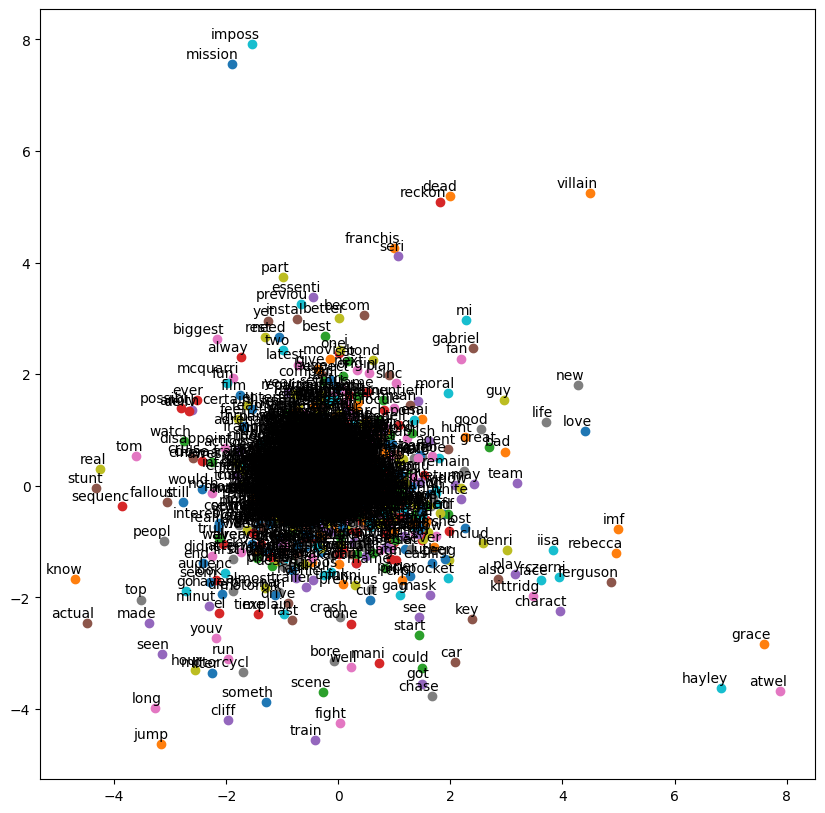

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# loading the model
model = Word2Vec.load("imdb_review_model.model")

# extracting the word vectors
word_vectors = model.wv
words = list(word_vectors.key_to_index.keys())

# reducing to 2 dimensions
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors[words])

# Plotting the words
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [1]:
# The GitHub link of your final csv file


# Link:
# https://github.com/hepzibahravuri/info5731/blob/main/sentiment_imdb_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [16]:
# Type your answer

'''I was able to thoroughly learn and solve the questions properly with satisfaction due to no time constraint.
The reference code was helpful! And this topic was interesting to learn.'''

'I was able to thoroughly learn and solve the questions properly with satisfaction due to no time constraint. \nThe reference code was helpful! And this topic was interesting to learn.'